# 2022年度第3ターム「実験数学C」 第05回 11/08(火)4限

In [ ]:
# 必要な外部モジュールをインストール
!pip install numpy sympy matplotlib

In [2]:
# 必要なモジュールをインポートする
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## 6組のデータを $(0.0, 2.0), (0.2, 2.12), (0.4, 1.62), (0.8, 1.53), (1.0, 2.0)$ とする．

### 1. 回帰直線を求める．

-0.11714285714285563 2.031904761904761


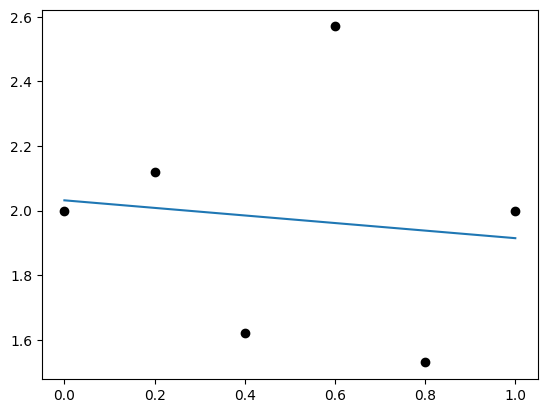

In [6]:
#座標をx、yそれぞれベクトルとして定義
x = np.array([0.0,0.2,0.4,0.6,0.8,1.0]) # 内積計算のためにnp.arrayで作る。
y = np.array([2.0,2.12,1.62,2.57,1.53,2.0])

#計算内容を関数として定義
def reg1dim(x, y):
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n)/
        ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b
#計算結果をabとして入れ込む
a, b = reg1dim(x, y)
#y=ax+bのパラメータabを表示
print(a,b)
#グラフを描画
plt.scatter(x, y, color="k")
plt.plot([0, x.max()], [b, a * x.max() + b]) #(0, b)地点から(xの最大値,ax + b)地点までの線
plt.savefig("./img/regression.png")
plt.show()

### 2. Lagrangeの $5$ 次補間多項式を求める．

必要な関数を定義する．

In [4]:
def lix(xs, i, x):
    """Lagrange補間で用いるl_i(x)関数

    Args:
        xs: x座標のリスト
        x: 変数
        i: 添え字

    Returns: l_i(x)
    """
    numerator, denominator = 1.0, 1.0
    for k in range(len(xs)):
        if k != i:
            numerator *= x - xs[k]
            denominator *= xs[i] - xs[k]

    return numerator / denominator


def lagrange(x, xs, ys):
    """Lagrange補間を用いて(n-1)次多項式を求める

    Args:
        xs: x座標のリスト
        ys: y座標のリスト

    Returns: 補間した多項式
    """
    # Lagrange補間で用いるl_i(x)を求める
    lixs = [lix(xs, i, x) for i in range(len(xs))]
    # 補間多項式を求める
    polynomial = sp.expand(np.dot(ys, lixs))

    return polynomial

324.21875*x**5 - 791.927083333333*x**4 + 669.21875*x**3 - 226.447916666667*x**2 + 24.9375*x + 2.0


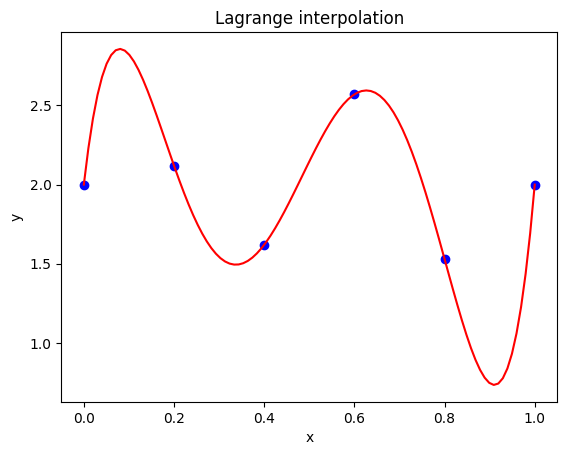

In [5]:
# 変数xを定義する
x = sp.Symbol("x")
# x座標
xs = np.array((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
# y座標
ys = np.array((2.0, 2.12, 1.62, 2.57, 1.53, 2.0))

# Lagrange補間を用いて，6点から5次多項式を求める
polynomial = lagrange(x, xs, ys)
print(polynomial)

# 求めた多項式のグラフを描画する
xplots = np.linspace(0.0, 1.0, 100)
yplots = [polynomial.subs(x, xi) for xi in xplots]
plt.title("Lagrange interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(xs, ys, color="blue")
plt.plot(xplots, yplots, color="red")
plt.savefig("./img/lagrange.png")
plt.show()